In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Task 1

In [27]:
original_mood_data = pd.read_csv("dataset_mood_smartphone.csv")

In [28]:
original_mood_data.head(5)

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [29]:
transformed_original_mood_data = pd.DataFrame(columns= ['ID','Dates','Mood','Circumplex.arousel','Circumplex.valence','Activity'
                                                        ,'Screen','Call','SMS','appCat.builtin','appCat.communication',
                                                        'appCat.entertainment','appCat.finance','appCat.game','appCat.office',
                                                        'appCat.other','appCat.social','appCat.travel','appCat.unknown',
                                                        'appCat.utilities','appCat.weather'])


In [30]:
original_mood_data['Dates'] = pd.to_datetime(original_mood_data['time']).dt.date
# Getting unique values (all the attributes) of column "variable"
variable = original_mood_data.variable.unique()
print(variable)

['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [31]:
# setting a startind date, excluding 2 days of february that are not consistent with the rest of the data
starting_date = pd.to_datetime('2014-03-04')
original_mood_data = original_mood_data[original_mood_data.Dates >= starting_date]
original_mood_data.head(5)

,Unnamed: 0,id,time,variable,value,Dates
7,8,AS14.01,2014-03-21 09:00:00.000,mood,6.0,2014-03-21
8,9,AS14.01,2014-03-21 11:00:00.000,mood,6.0,2014-03-21
9,10,AS14.01,2014-03-21 15:00:00.000,mood,7.0,2014-03-21
10,11,AS14.01,2014-03-21 19:00:00.000,mood,6.0,2014-03-21
11,12,AS14.01,2014-03-21 21:00:00.000,mood,6.0,2014-03-21


In [32]:
original_mood_data = pd.pivot_table(original_mood_data, index = ['id','time'], columns = 'variable',
                                    values = 'value').reset_index()
original_mood_data['Dates'] = pd.to_datetime(original_mood_data['time']).dt.date

In [33]:
# all attributes will handled with mean of the dates except of 'call' and 'sms' that can be handled like
# the sum of an entire day
attributes = {'circumplex.valence':'mean', 'circumplex.arousal' : 'mean', 'activity':'mean', 'screen':'mean',
            'call':'sum', 'sms':'sum', 'appCat.builtin': 'mean', 'appCat.communication': 'mean', 'appCat.entertainment': 'mean',
            'appCat.finance': 'mean', 'appCat.game': 'mean', 'appCat.office': 'mean', 'appCat.other': 'mean',
            'appCat.social': 'mean', 'appCat.travel': 'mean', 'appCat.unknown': 'mean', 'appCat.utilities': 'mean',
            'appCat.weather': 'mean', 'mood':'mean'}

In [34]:
# Creating my dataframe grouping for 'id' and 'Dates' and aggregating the attributes with mean and sum
original_mood_data = original_mood_data.groupby(['id', 'Dates']).agg(attributes).reset_index()

In [35]:
# filling missing values
original_mood_data = original_mood_data[~original_mood_data['activity'].isnull() & ~original_mood_data['mood'].isnull()]
original_mood_data = original_mood_data.reset_index()
original_mood_data.drop('index',axis=1,inplace=True)
original_mood_data

,id,Dates,circumplex.valence,circumplex.arousal,activity,screen,call,sms,appCat.builtin,appCat.communication,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,mood
0,AS14.01,2014-03-21,0.2,0.200000,0.134050,153.665872,6.0,0.0,14.269173,55.095526,...,6.193000,NaN,57.402000,29.968875,75.141667,70.418846,NaN,23.029000,NaN,6.20
1,AS14.01,2014-03-22,0.5,0.600000,0.236880,47.613651,3.0,1.0,7.781160,51.697063,...,7.025333,NaN,NaN,14.020429,36.636000,37.305000,NaN,39.207000,NaN,6.40
2,AS14.01,2014-03-23,0.8,0.200000,0.142741,67.067644,0.0,0.0,12.134396,53.442031,...,10.850750,NaN,NaN,12.137167,50.046611,NaN,NaN,30.086000,30.386,6.80
3,AS14.01,2014-03-24,0.0,0.800000,0.078961,76.772199,10.0,0.0,4.982506,47.541687,...,5.684333,NaN,3.010000,11.093000,74.968047,83.961000,NaN,89.366000,NaN,6.00
4,AS14.01,2014-03-25,0.5,0.500000,0.098374,169.097283,0.0,1.0,10.026874,69.437507,...,10.763500,NaN,NaN,29.803167,68.552536,NaN,29.402875,22.289300,NaN,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,AS14.33,2014-05-26,0.0,-0.400000,0.115201,300.399810,10.0,3.0,7.711316,34.320472,...,NaN,NaN,130.530000,16.845500,111.046204,NaN,NaN,NaN,NaN,5.40
1146,AS14.33,2014-05-27,0.4,-0.600000,0.012704,113.607750,1.0,2.0,8.545776,59.382943,...,NaN,NaN,NaN,17.835750,50.259100,NaN,NaN,18.724333,NaN,6.20
1147,AS14.33,2014-05-28,1.2,0.000000,0.103301,113.657683,10.0,1.0,9.590398,37.238750,...,NaN,NaN,44.738625,27.891895,99.281685,NaN,NaN,5.111000,NaN,8.20
1148,AS14.33,2014-05-29,1.0,-1.333333,0.169354,118.978033,5.0,1.0,6.452161,54.388125,...,NaN,NaN,NaN,9.734000,198.880222,0.939000,NaN,1.599500,NaN,7.00


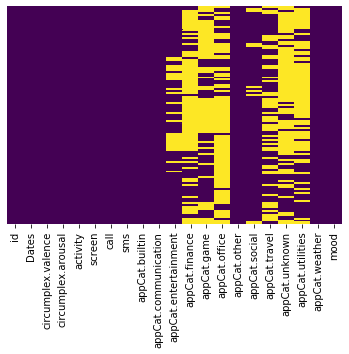

In [26]:
# Exploratory Data Analysis
sns.heatmap(original_mood_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# We can see that we have a lot of missing values in some columns that cannot be imputed
# These columns will be dropped
# We will also drop one row of data where 'screen' and 'appCat.builtin' value is missing
# The rest of the missing values will be handled by filling these values with the mean of the column

Text(0.5, 1.0, 'Histogram of Mood')

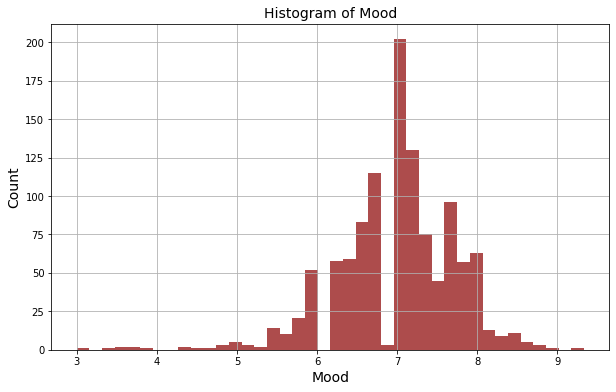

In [46]:
original_mood_data['mood'].hist(bins=40,color='darkred',alpha=0.7, figsize = (10,6))
plt.xlabel('Mood', fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.title('Histogram of Mood',fontsize = 14)

# We can conclude from this histogram that most of user's mood is between 6 and 8 with some outliers
# So an average valuable predictions could be if this value fall between [6,8]

# This histogram is useful because it will help us understand how can the mood-scale [1,10] be splitted into
# 3 classes so we can assign each patient to a class based on his mood and working with Support Vector Machine
# model for classification

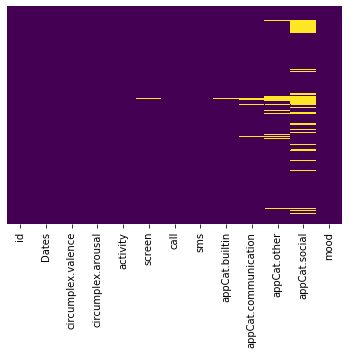

In [47]:
# Dropping the columns
original_mood_data.drop('appCat.utilities',axis=1,inplace=True)
original_mood_data.drop('appCat.weather',axis=1,inplace=True)
original_mood_data.drop('appCat.unknown',axis=1,inplace=True)
original_mood_data.drop('appCat.travel',axis=1,inplace=True)
original_mood_data.drop('appCat.finance',axis=1,inplace=True)
original_mood_data.drop('appCat.office',axis=1,inplace=True)
original_mood_data.drop('appCat.entertainment',axis=1,inplace=True)
original_mood_data.drop('appCat.game',axis=1,inplace=True)
sns.heatmap(original_mood_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

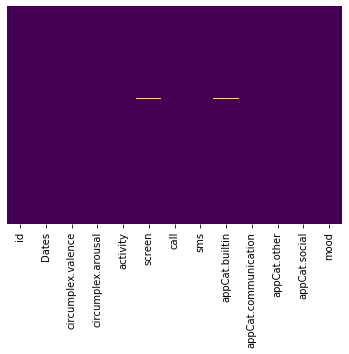

In [48]:
mean_appCat_social = np.mean(original_mood_data[['appCat.social']])
mean_appCat_other = np.mean(original_mood_data[['appCat.other']])
mean_appCat_communication = np.mean(original_mood_data[['appCat.communication']])

def impute_appCatsocial(cols):
    appCat_social = cols[0]
    if pd.isnull(appCat_social):

        return mean_appCat_social

    else:
        return appCat_social

def impute_appCatother(cols):
    appCat_other = cols[0]
    if pd.isnull(appCat_other):

        return mean_appCat_other

    else:
        return appCat_other

def impute_appCatcommunication(cols):
    appCat_communication = cols[0]
    if pd.isnull(appCat_communication):

        return mean_appCat_communication

    else:
        return appCat_communication
    
original_mood_data['appCat.social'] = original_mood_data[['appCat.social']].apply(impute_appCatsocial,axis=1)    
original_mood_data['appCat.other'] = original_mood_data[['appCat.other']].apply(impute_appCatother,axis=1)
original_mood_data['appCat.communication'] = original_mood_data[['appCat.communication']].apply(impute_appCatcommunication
                                                                                                ,axis=1)
sns.heatmap(original_mood_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

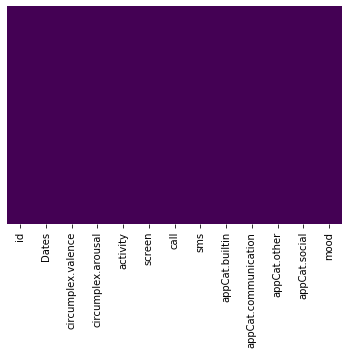

In [49]:
original_mood_data.dropna(inplace=True)
sns.heatmap(original_mood_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
original_mood_data.describe()

,circumplex.valence,circumplex.arousal,activity,screen,call,sms,appCat.builtin,mood
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,0.690336,-0.115864,0.121245,84.591057,2.411240,0.819804,25.476211,6.995473
std,0.428139,0.660661,0.096764,69.421474,3.399241,1.801686,81.469552,0.748183
min,-1.250000,-2.000000,0.000000,0.462000,0.000000,0.000000,-772.768558,3.000000
25%,0.400000,-0.600000,0.058148,46.182610,0.000000,0.000000,7.947667,6.600000
50%,0.800000,0.000000,0.097986,66.090129,1.000000,0.000000,12.210994,7.000000
75%,1.000000,0.333333,0.149517,97.743775,3.000000,1.000000,21.174622,7.500000
max,2.000000,2.000000,0.549430,960.503111,31.000000,17.000000,1399.054714,9.333333


In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(original_mood_data)


           id       Dates  circumplex.valence  circumplex.arousal  activity  \
0     AS14.01  2014-03-21            0.200000            0.200000  0.134050   
1     AS14.01  2014-03-22            0.500000            0.600000  0.236880   
2     AS14.01  2014-03-23            0.800000            0.200000  0.142741   
3     AS14.01  2014-03-24            0.000000            0.800000  0.078961   
4     AS14.01  2014-03-25            0.500000            0.500000  0.098374   
5     AS14.01  2014-03-26            0.600000           -0.200000  0.101308   
6     AS14.01  2014-03-27            0.800000            0.200000  0.159511   
7     AS14.01  2014-03-28            0.600000           -0.600000  0.095698   
8     AS14.01  2014-03-29            1.000000            0.200000  0.068203   
9     AS14.01  2014-03-30            0.750000           -0.500000  0.049093   
10    AS14.01  2014-03-31            0.600000            0.000000  0.070505   
11    AS14.01  2014-04-01            0.000000       

In [52]:
correlation = original_mood_data.corr()
correlation

,circumplex.valence,circumplex.arousal,activity,screen,call,sms,appCat.builtin,mood
circumplex.valence,1.000000,0.177788,0.172204,-0.061144,-0.081178,-0.080631,0.032222,0.688092
circumplex.arousal,0.177788,1.000000,0.001585,-0.088056,0.022478,0.021206,0.007175,0.148768
activity,0.172204,0.001585,1.000000,-0.091064,0.159646,0.058222,-0.016743,0.168862
screen,-0.061144,-0.088056,-0.091064,1.000000,-0.066779,0.003612,-0.034814,-0.082102
call,-0.081178,0.022478,0.159646,-0.066779,1.000000,0.149443,-0.025987,0.040228
sms,-0.080631,0.021206,0.058222,0.003612,0.149443,1.000000,-0.029536,-0.050084
appCat.builtin,0.032222,0.007175,-0.016743,-0.034814,-0.025987,-0.029536,1.000000,0.047664
mood,0.688092,0.148768,0.168862,-0.082102,0.040228,-0.050084,0.047664,1.000000


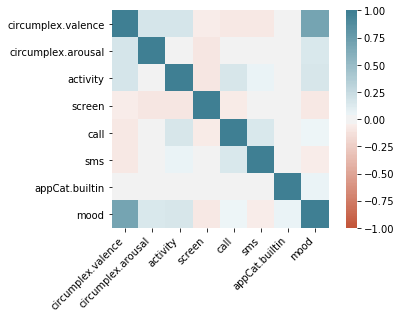

In [53]:
# From the correlation matrix we want check which attributes are very correlated with our target attribute 'mood'
# The stronger the color close to blue, the larger the correlation magnitude

ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [54]:
original_mood_data.drop('sms',axis=1,inplace=True)
original_mood_data.drop('screen',axis=1,inplace=True)

In [55]:
original_mood_data.drop('Dates',axis=1,inplace=True)
original_mood_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1149
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1121 non-null   object 
 1   circumplex.valence    1121 non-null   float64
 2   circumplex.arousal    1121 non-null   float64
 3   activity              1121 non-null   float64
 4   call                  1121 non-null   float64
 5   appCat.builtin        1121 non-null   float64
 6   appCat.communication  1121 non-null   object 
 7   appCat.other          1121 non-null   object 
 8   appCat.social         1121 non-null   object 
 9   mood                  1121 non-null   float64
dtypes: float64(6), object(4)
memory usage: 96.3+ KB


   ## Task 2

In [56]:
X = original_mood_data.iloc[:, :9].values
y = original_mood_data.iloc[:, 9].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])

# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_scaled = sc.fit_transform(X)
y = y.reshape(-1,1)
y_scaled = sc.fit_transform(y)

In [57]:
## Creating a special structure with window of 5 days and our target is the 6th day in y_structure

X_structure = []
y_structure = []

for i in range(5, 1121):
    X_structure.append(X_scaled[i-5:i, 0:8])
        
for i in range(5,1121):
    y_structure.append(y_scaled[i, 0])

X_structure, y_structure = np.array(X_structure), np.array(y_structure)

In [58]:
# Building our structure for the RNN using LSTM Layers

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import metrics

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (5, 8)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])


# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data=(X_val, y_val))

Using TensorFlow backend.


Train on 624 samples, validate on 157 samples
Epoch 1/30
624/624 [==============================] - 9s 14ms/step - loss: 0.2026 - mae: 0.3993 - val_loss: 0.0555 - val_mae: 0.2028
Epoch 2/30
624/624 [==============================] - 1s 2ms/step - loss: 0.0239 - mae: 0.1274 - val_loss: 0.0161 - val_mae: 0.0920
Epoch 3/30
624/624 [==============================] - 1s 2ms/step - loss: 0.0159 - mae: 0.0979 - val_loss: 0.0141 - val_mae: 0.0885
Epoch 4/30
624/624 [==============================] - 1s 2ms/step - loss: 0.0144 - mae: 0.0914 - val_loss: 0.0143 - val_mae: 0.0895
Epoch 5/30
624/624 [==============================] - 1s 2ms/step - loss: 0.0140 - mae: 0.0908 - val_loss: 0.0141 - val_mae: 0.0882
Epoch 6/30
624/624 [==============================] - 1s 2ms/step - loss: 0.0145 - mae: 0.0926 - val_loss: 0.0141 - val_mae: 0.0879
Epoch 7/30
624/624 [==============================] - 1s 2ms/step - loss: 0.0142 - mae: 0.0904 - val_loss: 0.0141 - val_mae: 0.0879
Epoch 8/30
624/624 [=========

In [59]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


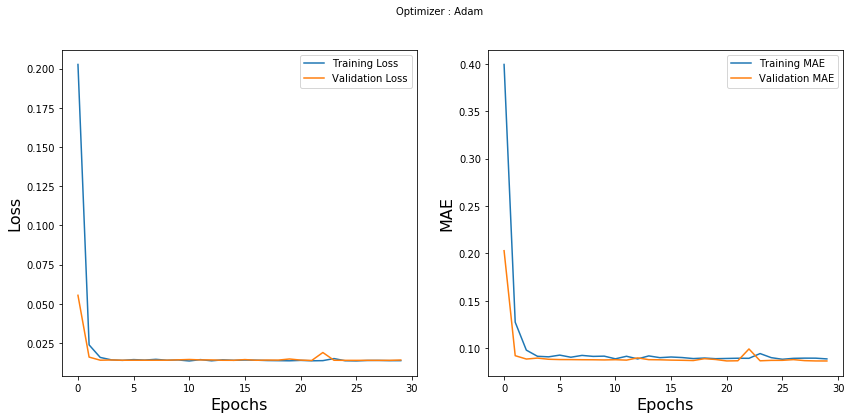

In [60]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('MAE', fontsize=16)
plt.xlabel('Epochs', fontsize = 16)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend(loc='upper right')
plt.show()

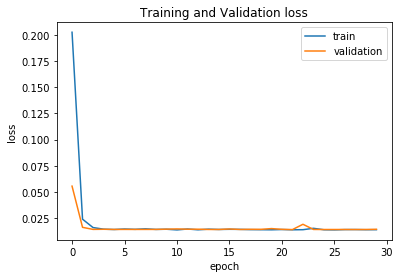

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

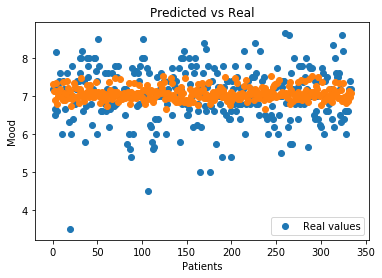

In [62]:
y_pred = regressor.predict(X_test)
y_test_2 = y_test.reshape(-1,1)
real_values = sc.inverse_transform(y_test_2)
predictions = sc.inverse_transform(y_pred)
compare = pd.DataFrame(list(zip(real_values, predictions)), 
               columns =['Real', 'Predicted']) 
compare['Distance'] = abs(compare['Real'] - compare['Predicted'])
x = np.arange(0,335)
plt.scatter(x,compare['Real'])
plt.scatter(x, compare['Predicted'])
plt.title('Predicted vs Real')
plt.xlabel('Patients')
plt.ylabel('Mood')
plt.legend(['Real values'])
plt.show()

# As expected our model generalizes around mood-value 7, that's between [6,8] as we expected when we
# saw the histogram of moods.

In [63]:
from sklearn.metrics import mean_squared_error
RNN_mse = mean_squared_error(real_values, predictions)
RNN_mse

0.468295996402575

In [64]:
RNN_rmse = np.sqrt(RNN_mse)
RNN_rmse



0.6843215592121696

In [94]:
RNN_mae = mean_absolute_error(real_values, predictions)
RNN_mae

0.5147783807023841

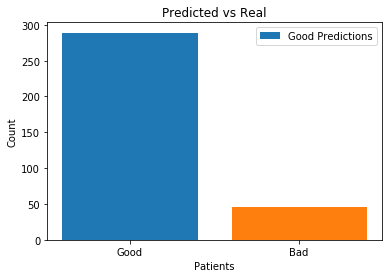

In [65]:
# To evaluate if our predictions make sense and to be more specific and sure about our predictions we can
# assign as good predictions,# predictions that are  at maximum point further from the
# real value and all the other as bad predictions.

bad_predictions = 0
good_predictions = 0
for i in compare['Distance']:
    if i <1:
        good_predictions = good_predictions +1
    else:
        bad_predictions = bad_predictions +1
        
x = np.arange(0,1)
plt.bar('Good',good_predictions)
plt.bar('Bad',bad_predictions)
plt.title('Predicted vs Real')
plt.xlabel('Patients')
plt.ylabel('Count')
plt.legend(['Good Predictions'])
plt.show()    

# Total predictions 335
# Good predictions 289
# Bad predictions 46


## SVM and SVR

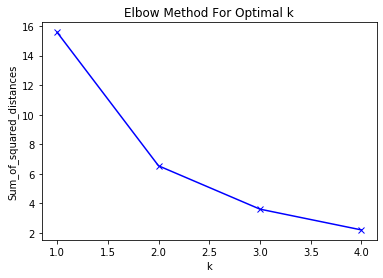

In [66]:
# The splitting of clusters will be based only the mood column that we created for RNN 
# Based on the y_structure
from sklearn.cluster import KMeans
y_structure_reshaped = y_structure.reshape(-1,1)

Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(y_structure_reshaped)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

kmeans = KMeans(n_clusters=3)
mood_list = []
labels = []
data_X = []

for i in range(5, 1121):
    data_X.append(X_scaled[i, 0:8])
    
mood_list = y_structure_reshaped
mood_list_2 = pd.DataFrame(mood_list)
kmeans.fit(mood_list_2)

# We assume that these labels are our "true labels" and each patient
# has been assigned to a cluster based on his 'mood value'
labels = kmeans.labels_
X_structure_pd = pd.DataFrame(data_X)

X_structure_pd['Clusters'] = labels
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_structure_pd.drop('Clusters',axis=1),labels,
                                                random_state=42)

#X_structure_pd.drop('id', axis =1, inplace=True)
support_vector_classifier_model = SVC()
support_vector_classifier_model.fit(Xtrain,ytrain)
predictions_SVC = support_vector_classifier_model.predict(Xtest)


print(classification_report(ytest,predictions_SVC))        

              precision    recall  f1-score   support

           0       0.76      0.52      0.62        90
           1       0.72      0.46      0.56        61
           2       0.58      0.81      0.68       128

    accuracy                           0.64       279
   macro avg       0.69      0.60      0.62       279
weighted avg       0.67      0.64      0.63       279



In [116]:
print(confusion_matrix(ytest,predictions_SVC))

[[ 47   0  43]
 [  2  28  31]
 [ 13  11 104]]


In [68]:
# Let's do some gridsearch

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(Xtrain,ytrain)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.458, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.458, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.461, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.461, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.458, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.458, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.461, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.461, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.461, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.458, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.485, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.473, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.479, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.458, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.458, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.461, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.461, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.485, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.473, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.479, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.6s finished


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [69]:
grid_predictions_SVC = grid.predict(Xtest)
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [70]:
print(classification_report(ytest,grid_predictions_SVC))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        90
           1       0.64      0.59      0.62        61
           2       0.61      0.66      0.63       128

    accuracy                           0.64       279
   macro avg       0.65      0.63      0.64       279
weighted avg       0.64      0.64      0.64       279



In [71]:
sc.inverse_transform(kmeans.cluster_centers_)

array([[7.75240341],
       [5.92834052],
       [6.93617609]])

In [72]:
# Predictions

cluster_0 = 0
cluster_1 = 0
cluster_2 = 0
for i in original_mood_data['mood']:
    if i >7.314295:
        cluster_2 = cluster_2 +1
    elif i >6.339219 and i <= 7.314294:
        cluster_0 = cluster_0 +1
    else:
        cluster_1 = cluster_1 + 1

# Cluster_0 [6.339219 , 7.314294]
# Cluster_1 [1 , 6.339218]
# Cluster_2 [7.314295 , 10]

<Figure size 432x288 with 0 Axes>

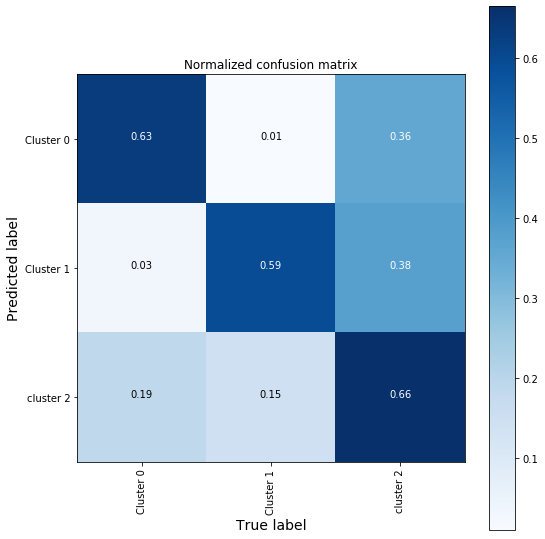

In [120]:
classes = ['Cluster 0', 'Cluster 1', 'cluster 2']
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Predicted label',fontsize =14)
    plt.xlabel('True label',fontsize =14)
    plt.tight_layout()


# compute confusion matrix
cnf_matrix = confusion_matrix(ytest, grid_predictions_SVC)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, title='Normalized confusion matrix')
plt.show()

# We can conlude that Support Vector Machines predict well 80% if mood belongs
# to cluster 0 that means between [6.339219 , 7.314294]



In [85]:
from sklearn import svm
clf = svm.SVR()

#SVR()
targets = []
for i in range(5, 1121):
    targets.append(y_scaled[i, -1])

from sklearn.model_selection import train_test_split
Xtrain_SVR, Xtest_SVR, ytrain_SVR, ytest_SVR = train_test_split(X_structure_pd,targets,test_size=0.3,
                                                random_state=42)
Xtrain_SVR, SVR_Xval, ytrain_SVR, SVR_yval = train_test_split(Xtrain_SVR, ytrain_SVR, test_size=0.3, random_state=1)



In [86]:
ytrain_SVR_reshaped = np.array(ytrain_SVR).reshape(-1,1)
clf.fit(Xtrain_SVR, ytrain_SVR_reshaped)

SVR_regressor = clf.predict(Xtest_SVR)

C:\Users\adorr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


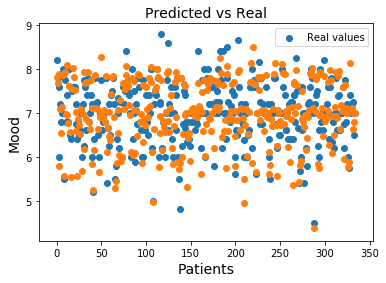

In [104]:
ytest_SVR = np.array(ytest_SVR)
ytest_SVR = ytest_SVR.reshape(-1,1)
SVR_real_values = sc.inverse_transform(ytest_SVR)
SVR_regressor = SVR_regressor.reshape(-1,1)
SVR_predictions = sc.inverse_transform(SVR_regressor)
SVR_compare = pd.DataFrame(list(zip(SVR_real_values, SVR_predictions)), 
               columns =['Real', 'Predicted']) 
SVR_compare['Distance'] = abs(SVR_compare['Real'] - SVR_compare['Predicted'])
x = np.arange(0,335)
plt.scatter(x,SVR_compare['Real'])
plt.scatter(x, SVR_compare['Predicted'])
plt.title('Predicted vs Real',fontsize = 14)
plt.xlabel('Patients', fontsize = 14)
plt.ylabel('Mood',fontsize = 14)
plt.legend(['Real values'])
plt.Figure(figsize=(20,14))
plt.show()


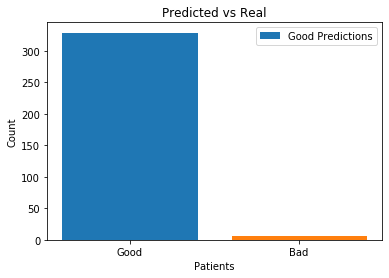

In [89]:
SVR_bad_predictions = 0
SVR_good_predictions = 0
for i in SVR_compare['Distance']:
    if i <1:
        SVR_good_predictions = SVR_good_predictions +1
    else:
        SVR_bad_predictions = SVR_bad_predictions +1
        
x = np.arange(0,1)
plt.bar('Good',SVR_good_predictions)
plt.bar('Bad',SVR_bad_predictions)
plt.title('Predicted vs Real')
plt.xlabel('Patients')
plt.ylabel('Count')
plt.legend(['Good Predictions'])
plt.show()    


In [90]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(SVR_real_values, SVR_predictions)
mse

0.10629911956367728

In [91]:
np.mean(SVR_compare['Distance'])

array([0.25])

In [92]:
rmse = np.sqrt(mse)
rmse

0.32603545752521657

In [93]:
from sklearn.metrics import mean_absolute_error
mae_svr = mean_absolute_error(SVR_real_values, SVR_predictions)
mae_svr

0.24527146841580913